In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

*рассмотрим случай когда мы имеем небольшую выборку (n<30)*  
*и сравним со случаем когда выборка большая.*  
*В небольшой выборке ыборочное среднее сильно отличается от среднего генральной совокупности (ГС)*

### <span style='background :Moccasin' > Шаг 1 </span>
**зададим ГС и два размера выборок**  
*1.1 сгенерируем ГС в котором значения распределены нормально*

In [2]:
mu, sigma = 100, 10 # mean and standard deviation
population = np.random.normal(mu, sigma, 10000).round(2)

*1.2 определим статистики ГС*

In [3]:
mean_gen_pop = np.mean(population) # mean
std_gen_pop = np.std(population) # standard deviation

*1.3 зададим две выборки с разным количеством элементов*

In [4]:
sample_size_1 = 40 # sample with big size
sample_size_2 = 5 # sample with small size
sample_1 = np.random.choice(population, sample_size_1, False) # sample generation
sample_2 = np.random.choice(population, sample_size_2, False) # sample generation

*1.4 посмотрим на распределение выборочных средних при разных размерах выборки*

In [5]:
sample_mean_1=[]
sample_mean_2=[]
n = 1000
for i in range(n):
    sample_1 = np.random.choice(population, sample_size_1, False) # sample generation
    sample_2 = np.random.choice(population, sample_size_2, False) # sample generation
    sample_mean_1.append(sample_1.mean())
    sample_mean_2.append(sample_2.mean())

[Text(0.5, 0, 'sample_mean_2')]

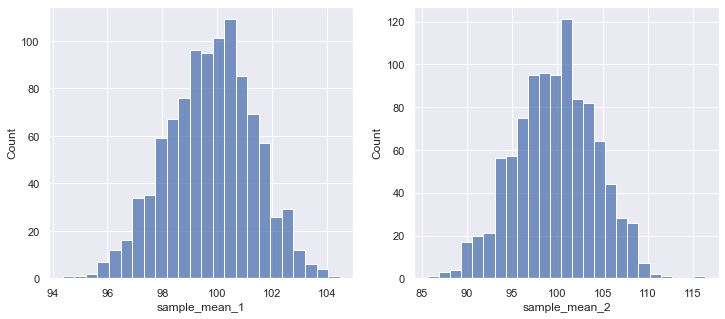

In [6]:
sns.set()
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
#create chart in each subplot
ak1 = sns.histplot(sample_mean_1, kde = False, ax=axes[0])
ak2 = sns.histplot(sample_mean_2, kde = False, ax=axes[1])
ak1.set(xlabel="sample_mean_1")
ak2.set(xlabel="sample_mean_2")


*мы видим, что при большем размере выборки распределение средних распологается ближе к среднему ГС*

### <span style='background :Moccasin' > Шаг 2 </span> 
*z-преобразование выборочных средних (через стд.отк. ГС)*  

*2.1 определим стандартную ошибку среднего (se)*  
*важно!!! при расчете se используем стандартное отклонение ГС*
$$
se = \frac{\sigma}{\sqrt{n}} \\
$$

In [27]:
se_1 = std_gen_pop / sample_size_1 ** 0.5
se_1

1.592811814694504

In [28]:
se_2 = std_gen_pop / sample_size_2 ** 0.5
se_2

4.5051521412981375

*2.2 для выборочных средних с разным размером выборки определим z-значения*  
*в данном случае, z - значения это отклонение выборочных средних в единицах стандартной ошибки среднего*  
$$
z = \frac{X - \mu}{se} \\
$$
*где X - среднее выборки, $\mu$ - среднее ГС*

In [29]:
n = 10000 # quantity of samples
z_scores_1=[]
z_scores_2=[]
for i in range(n):
#     create two type of sample
    sample_1 = np.random.choice(population, sample_size_1, False)
    sample_2 = np.random.choice(population, sample_size_2, False)
#     define sample mean
    sample_mean_1 = sample_1.mean()
    sample_mean_2 = sample_2.mean()
    #z-распределение
    z_score_1 = (sample_mean_1 - mean_gen_pop)/se_1
    z_score_2 = (sample_mean_2 - mean_gen_pop)/se_2
    z_scores_1.append(z_score_1)
    z_scores_2.append(z_score_2)

In [30]:
# сreate dataframe
df_z = pd.DataFrame(list(zip(z_scores_1, z_scores_2)),
               columns =['z_scores_1', 'z_scores_2'])

*2.3 строим распределение выборочных средних*

(-4.0, 4.0)

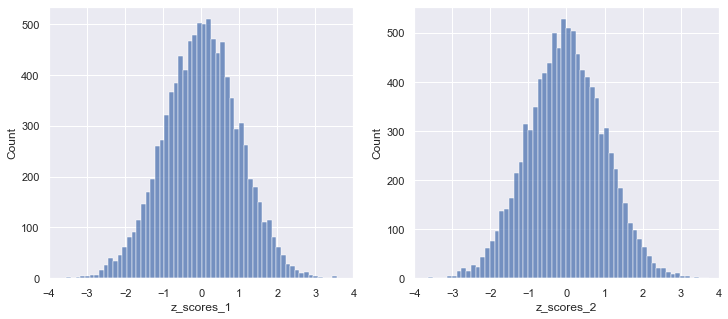

In [31]:
sns.set()
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
#create chart in each subplot
ak1 = sns.histplot(df_z.z_scores_1, kde = False, ax=axes[0])
ak2 = sns.histplot(df_z.z_scores_2, kde = False, ax=axes[1])
# define lim for x-axis
ak1.set_xlim(-4, 4)
ak2.set_xlim(-4, 4)

*мы видим, что размер выборки никак не влияет на z-значения выборочных средних*  
*в случае если мы используем стандартное отклонение ГС,*  
*т.к. в каждом случае у нас меняется только выборочное среднее*

### <span style='background :Moccasin' > Шаг 3 </span> 
*t-преобразование выборочных средних (через стд.отк. выборки)*  
*3.1 делаем z-преобразование, только при расчете стандартной ошибки среднего*  
*используем стандартное отклонение выборки:*  
$$
se_s = \frac{sd}{\sqrt{n}} \\
$$
*называем это распределение t-score:*
$$
z = \frac{X - \mu}{se} \\
$$

In [32]:
n = 10000 # quantity of samples
t_scores_1=[]
t_scores_2=[]
for i in range(n):
#     create two type of sample
    sample_1 = np.random.choice(population, sample_size_1, False)
    sample_2 = np.random.choice(population, sample_size_2, False)
    sample_std_1 = sample_1.std()
    sample_std_2 = sample_2.std()
    se_1 = sample_std_1/sample_size_1 ** 0.5
    se_2 = sample_std_2/sample_size_2 ** 0.5
#     define sample mean
    sample_mean_1 = sample_1.mean()
    sample_mean_2 = sample_2.mean()
    #z-распределение
    t_score_1 = (sample_mean_1 - mean_gen_pop)/se_1
    t_score_2 = (sample_mean_2 - mean_gen_pop)/se_2
    t_scores_1.append(t_score_1)
    t_scores_2.append(t_score_2)

In [33]:
# сreate dataframe
df_t = pd.DataFrame(list(zip(t_scores_1, t_scores_2)),
               columns =['t_scores_1', 't_scores_2'])

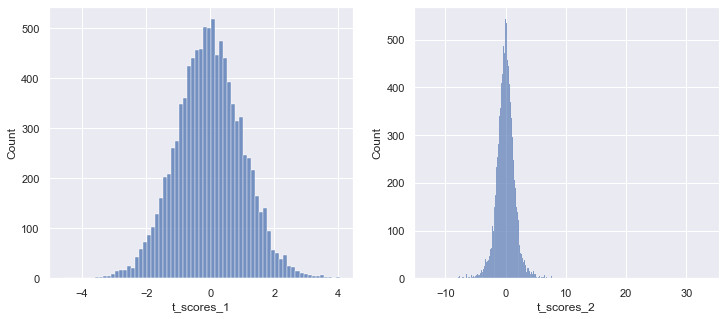

In [34]:
sns.set()
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
#create chart in each subplot
ak1 = sns.histplot(df_t.t_scores_1, kde = False, ax=axes[0])
ak2 = sns.histplot(df_t.t_scores_2, kde = False, ax=axes[1])
# define lim for x-axis
# ak1.set_xlim(-4, 4)
# ak2.set_xlim(-4, 4)

*мы видим, что при малых размерах выборки (t_scores_2) выборочные средние*  
*сильно отклоняются от среднего ГС:*  
*в случае больших выборок (t_scores_1) распределение средних выглядит как нормальное,*   
*т.е. большинство (95%) выборочных средних лежит в диапазоне 1.96se,*   
*Расширение диапазона выборочных средних в случае малых выборок сильно увеличивает риск ошибки первого рода*  
*(ошибка 1-го рода - "изменения есть, но на самом деле их нет") - т.е. средние могут сильно отклоняться,*  
*не потому что есть изменения, а потому что выборка маленькая*  
#### <span style='background :LightSkyBlue' >таким образом, чтобы работать с маленькими выборки на помощь приходит t-распределение (распределение Стюдента) </span>

### <span style='background :Moccasin' > Шаг 4 </span>
*рассмотрим пример: среднее ГС = 10, выборочное среднее = 10.8, sd = 2, N = 25*    

In [35]:
m = 10
x, sd, N = 10.8, 2, 25
se = sd/np.sqrt(N)

*4.1 определяем z-значения*
$$
z = \frac{X - \mu}{se} \\
$$

In [38]:
z = (x-m)/se
z

2.0000000000000018

*отклонение от среднего ГС равно 2*  
*определяем p-value, предполагая что распределение нормальное*  
https://gallery.shinyapps.io/dist_calc/  
*p = 0.0455*  
*p<0.05, отклоняем нулевую гипотезу*

*4.2 определяем t-значения*  
*количество степеней свободы*  
*df = n-1 = 24*

In [39]:
se = sd/np.sqrt(N)
t = (x-m)/se
t

2.0000000000000018

*определяем p-value с использованием "t" распределения*  
*используя t = 2 получаем p-value 0.0569*  
*это не позволяет нам отклонить нулевую гипотезу*  

### <span style='background :Moccasin' > P.S. (1) </span>
*таблица для расчета доверительного интервала при t-распределении:*  
https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm